## Data Pre-Processing

### Import Packages and CSV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

# Create a dataframe
df = pd.read_csv('EasyVisa.csv')
print(df.shape)

(25480, 12)


## Data Cleaning

### Handling Missing values
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

### Check Null Values

In [4]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [5]:
features_with_na

[]

- There are no null values in the dataset

### 3.2 Other Data Cleaning steps

#### Handling Duplicates

In [6]:
df.duplicated().sum()

0

- No Duplicates in the dataset

#### Remove case_id from the dataset as it cannot used in Model Training

In [7]:
df.drop(columns=['case_id'], axis=1, inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Feature Engineering

### Feature Extraction

In [9]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [10]:
from datetime import date

current_year = date.today().year
print(current_year)

2025


### Subtract current year with year of estab to get company's age

In [11]:
df['company_age'] = current_year - df['yr_of_estab']
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [12]:
df.drop(columns=['yr_of_estab'], axis=1, inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


## Type of Features

### Numeric Features

In [13]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(num_features)

['no_of_employees', 'prevailing_wage', 'company_age']


### Categorical Features

In [14]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(cat_features)

['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


### Discrete features

In [21]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


### Continuous Features

In [22]:
continuous_feature = [feature for feature in num_features if len(df[feature].unique()) > 25]
print('Num of Continous Features :', len(continuous_feature))

Num of Continous Features : 3


## Split X and Y
- Split Dataframe to X and y
- Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.

In [23]:
X = df.drop(columns=['case_status'], axis=True)
y = df['case_status']

In [24]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

### Manual encoding target column

In [25]:
y = np.where(y == 'Denied', 1, 0)
y

array([1, 0, 1, ..., 0, 0, 0])

## Feature Transformation

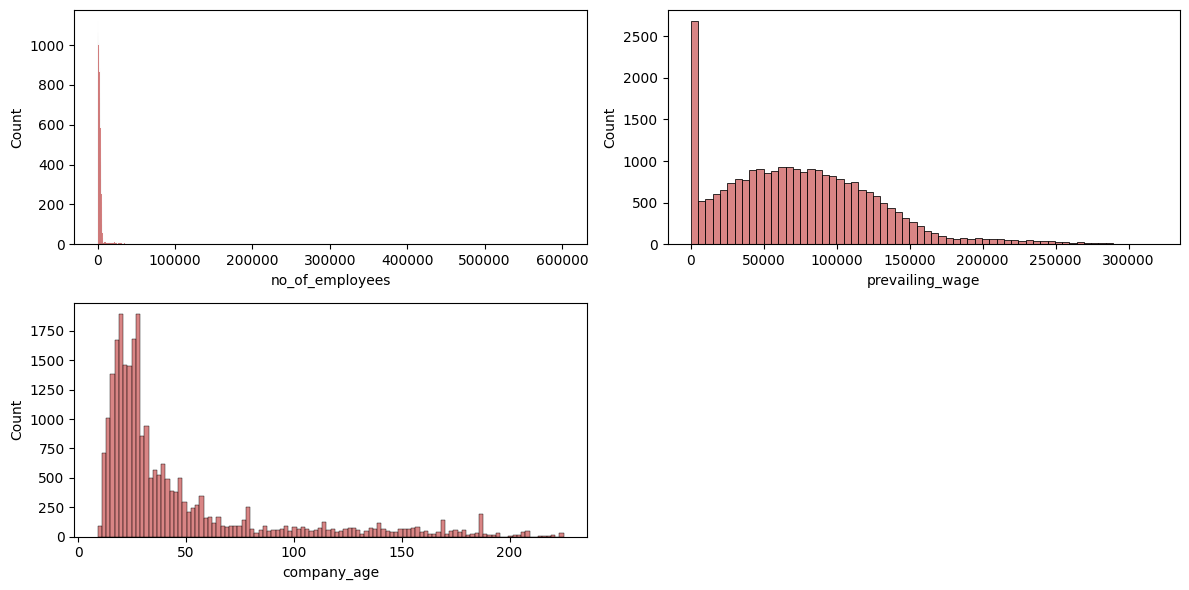

In [26]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x = X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

- No of employees and Copmany age column is skewed
- Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.



#### Checking Skewness

What is Skewness ?

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [27]:
X[continuous_feature].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

- Positiviely Skewed : company_age, no_of_employees.
- We can handle outliers and then check the skewness.

### Apply Power Transformer to Check if it can reduces the outliers

In [28]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [ ]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

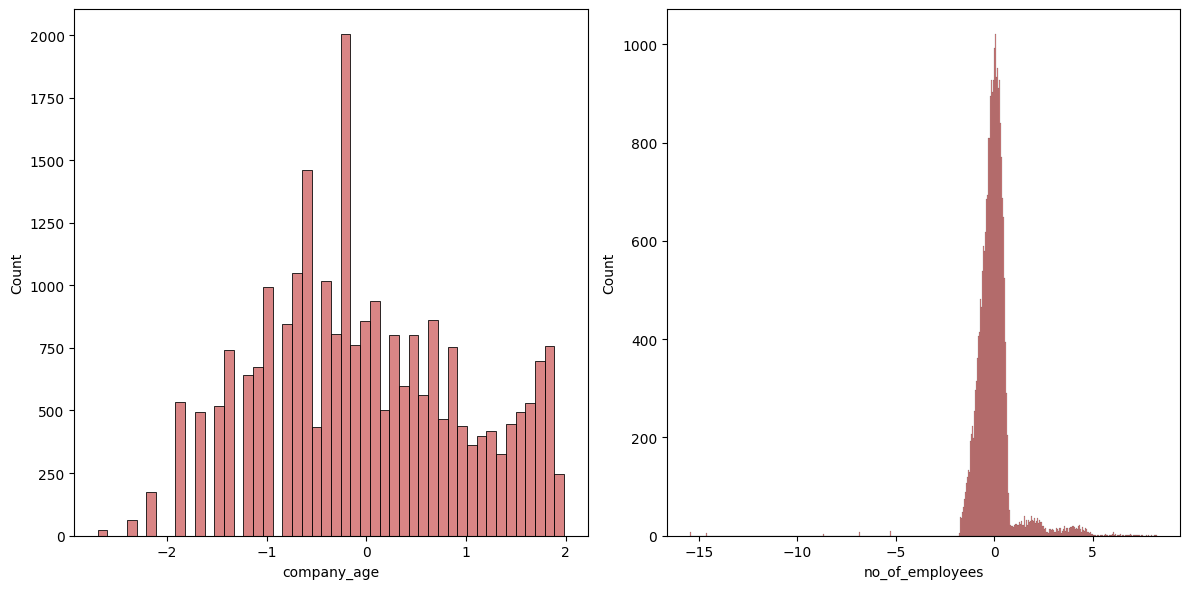

In [30]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

#### Checking Skewness

In [31]:
X_copy.skew(axis=0, skipna=True)

company_age        0.112260
no_of_employees    0.399339
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [32]:
for feature in cat_features:
    print(feature, ":", df[feature].unique())

continent : ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee : ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience : ['N' 'Y']
requires_job_training : ['N' 'Y']
region_of_employment : ['West' 'Northeast' 'South' 'Midwest' 'Island']
unit_of_wage : ['Hour' 'Year' 'Week' 'Month']
full_time_position : ['Y' 'N']
case_status : ['Denied' 'Certified']


### Feature Encoding and Scaling

**One Hot Encoding for Columns which had lesser unique values and not ordinal**
- One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
- Ordinal Encoding for Columns which has many unique categories

**Ordinal encoding is used here as label encoder is supported for column transformer.**
- Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler**
- Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
- Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

#### Selecting number features for preprocessing

In [35]:
num_features = list(X.select_dtypes(exclude='object').columns)
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

#### Preprocessing using Column Transformer

In [36]:
or_columns = [
    "has_job_experience",
    "requires_job_training",
    "full_time_position",
    "education_of_employee",
]
oh_columns = ["continent", "unit_of_wage", "region_of_employment"]
transform_columns = ["no_of_employees", "company_age"]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
or_transformer = OrdinalEncoder()

transform_pipe = Pipeline(
    steps=[("transformer", PowerTransformer(method="yeo-johnson"))]
)

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("ordinalEncoder", or_transformer, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)


In [37]:
X = preprocessor.fit_transform(X)

In [38]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

## Classification

In [40]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42, sampling_strategy='minority')

# fit the model to generate the data
X_res, y_res = smt.fit_resample(X, y)

### Train Test Split

- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((13629, 24), (3408, 24))

In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, f1_score, recall_score, precision_score, roc_curve, roc_auc_score


In [48]:
def evaluate_clf(actual, prediction):
    acc = accuracy_score(actual, prediction)
    f1 = f1_score(actual, prediction)
    precision = precision_score(actual, prediction)
    recall = recall_score(actual, prediction)
    roc_auc = roc_auc_score(actual, prediction)

    return acc, f1, precision, recall, roc_auc


In [49]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    # "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier(),
}


In [52]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    """
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    """

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models_list = []
    accuracy_list = []
    auc = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        # make prediction
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        (
            model_train_accuracy,
            model_train_f1,
            model_train_precision,
            model_train_recall,
            model_train_rocauc_score,
        ) = evaluate_clf(y_train, y_train_pred)

        # Test set peformancce
        (
            model_test_accuracy,
            model_test_f1,
            model_test_precision,
            model_test_recall,
            model_test_rocauc_score,
        ) = evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print("Model performance for Training set")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 score: {:.4f}".format(model_train_f1))
        print("- Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}".format(model_train_recall))
        print("- Roc Auc Score: {:.4f}".format(model_train_rocauc_score))

        print("-" * 40)

        print("Model performance for Test set")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print("- F1 score: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall: {:.4f}".format(model_test_recall))
        print("- Roc Auc Score: {:.4f}".format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print("=" * 35)
        print("\n")

        report = pd.DataFrame(
            list(
                zip(
                    models_list,
                    accuracy_list,
                )
            ),
            columns=["Model Name", "Accuracy"],
        ).sort_values(by=["Accuracy"], ascending=False)

    return report


## Model Training

In [53]:
base_model_report = evaluate_models(X=X_res, y=y_res, models=models)


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model performance for Test set
- Accuracy: 0.9501
- F1 score: 0.9542
- Precision: 0.9465
- Recall: 0.9620
- Roc Auc Score: 0.9491


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model performance for Test set
- Accuracy: 0.9266
- F1 score: 0.9326
- Precision: 0.9256
- Recall: 0.9397
- Roc Auc Score: 0.9255


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8897
- F1 score: 0.8965
- Precision: 0.9068
- Recall: 0.8865
- Roc Auc Score: 0.8900
----------------------------------------
Model performance for Test set
- Accuracy: 0.8791
- F1 score: 0.8875
- Precision: 0.8919
- Recall: 0.8832
- Roc Auc Score: 0.8788


Logistic Regression
Model perform

### Results of All Models

In [54]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.950117
4,K-Neighbors Classifier,0.941608
5,XGBClassifier,0.935153
1,Decision Tree,0.926643
2,Gradient Boosting,0.879108
6,Support Vector Classifier,0.857101
7,AdaBoost Classifier,0.845951
3,Logistic Regression,0.725939


Here we can use Random Forest for Hyper Parameter Tuning

#### Define the parameter distribution for Random forest

In [55]:
xgboost_params = {"max_depth": range(3, 10, 2), "min_child_weigh": range(1, 6, 2)}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [10, 50, 100, 200],
}

knn_params = {
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "weights": ["uniform", "distance"],
    "n_neighbors": [3, 4, 5, 7, 9],
}


In [60]:
randomcv_models = [
    ("XGBoost", XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params),
]


#### Create a function for model training and report which can be used in hyperparameter tuning loop



In [61]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1,
    )
    
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weigh': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [62]:
model_param

{'XGBoost': {'min_child_weigh': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

### Retraining the Model with best Parameters

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param["RF"]),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param["KNN"]),
    "XGBClassifier": XGBClassifier(**model_param["XGBoost"], n_jobs=-1),
}
tuned_report = evaluate_models(X=X_res, y=y_res, models=best_models)


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model performance for Test set
- Accuracy: 0.9513
- F1 score: 0.9552
- Precision: 0.9490
- Recall: 0.9614
- Roc Auc Score: 0.9504


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------------
Model performance for Test set
- Accuracy: 0.9683
- F1 score: 0.9711
- Precision: 0.9577
- Recall: 0.9848
- Roc Auc Score: 0.9669


XGBClassifier
Model performance for Training set
- Accuracy: 0.9996
- F1 score: 0.9996
- Precision: 0.9992
- Recall: 1.0000
- Roc Auc Score: 0.9995
----------------------------------------
Model performance for Test set
- Accuracy: 0.9448
- F1 score: 0.9491
- Precision: 0.9455
- Recall: 0.9527
- Roc Auc Score: 0.9442




In [64]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.968310
0,Random Forest Classifier,0.951291
2,XGBClassifier,0.944836


In [65]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9683
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1568
           1       0.96      0.98      0.97      1840

    accuracy                           0.97      3408
   macro avg       0.97      0.97      0.97      3408
weighted avg       0.97      0.97      0.97      3408



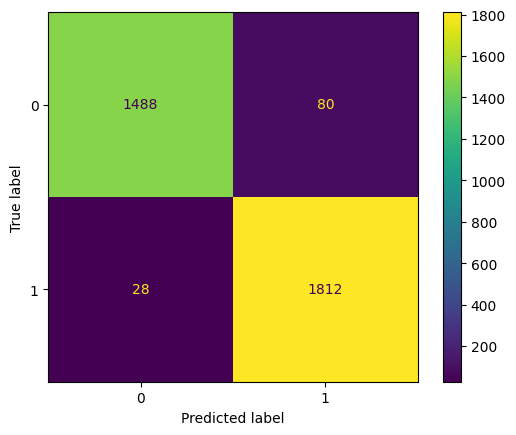

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.66%